In [1]:
import numpy as np
import scipy.stats as si
def black_scholes(S, K, T, r, sigma, option = 'call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))  
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))      
    return result
print("Call Option Price with Black-Scholes Model:", black_scholes(100, 100, 1, 0.05, 0.2, option = 'call'))
print("Put Option Price with Black-Scholes Model:", black_scholes(100, 100, 1, 0.05, 0.2, option = 'put'))

Call Option Price with Black-Scholes Model: 10.450583572185565
Put Option Price with Black-Scholes Model: 5.573526022256971


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as si
from datetime import datetime

# 下载历史数据
start_date = '2023-01-01'
end_date = '2023-07-01'
df = yf.download('AAPL', start=start_date, end=end_date)

# 计算日收益率
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

# 计算年化波动率
volatility = df['log_return'].std() * np.sqrt(252)

# 获取标的资产当前价格
S = df['Close'][-1]

# 设置期权参数
K = 200
T = (datetime(2023, 8, 4) - datetime(2023, 7, 1)).days / 365.0
r = 0.05

def black_scholes(S, K, T, r, sigma, option = 'call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

print("Call Option Price with Black-Scholes Model:", black_scholes(S, K, T, r, volatility, option = 'call'))

[*********************100%***********************]  1 of 1 completed
Call Option Price with Black-Scholes Model: 2.794593432592009


In [3]:
# 导入相关库
import numpy as np
from scipy.stats import norm
# 定义Black-Scholes Greeks计算函数
def black_scholes_greeks(S, X, T, r, sigma, option = 'call'):
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T) 
    if option == 'call':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        theta = -(S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))) - r * X * np.exp(-r * T) * norm.cdf(d2)
        vega = S * norm.pdf(d1) * np.sqrt(T)
        rho = T * X * np.exp(-r * T) * norm.cdf(d2)
    elif option == 'put':
        delta = norm.cdf(d1) - 1
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        theta = -(S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))) + r * X * np.exp(-r * T) * norm.cdf(-d2)
        vega = S * norm.pdf(d1) * np.sqrt(T)
        rho = -T * X * np.exp(-r * T) * norm.cdf(-d2)   
    return delta, gamma, theta, vega, rho
# 参数
S = 210    # 标的资产当前价格
X = 200    # 行权价格
T = 1/12   # 到期时间
r = 0.05   # 无风险利率
sigma = 0.25  # 标的资产年度波动率
# 计算 Greeks
delta, gamma, theta, vega, rho = black_scholes_greeks(S, X, T, r, sigma, option='call')
print(f"Delta: {delta}, Gamma: {gamma}, Theta: {theta}, Vega: {vega}, Rho: {rho}")

Delta: 0.779313204372002, Gamma: 0.01957205051678267, Theta: -34.514440469346155, Vega: 17.981821412294074, Rho: 12.569513918175065


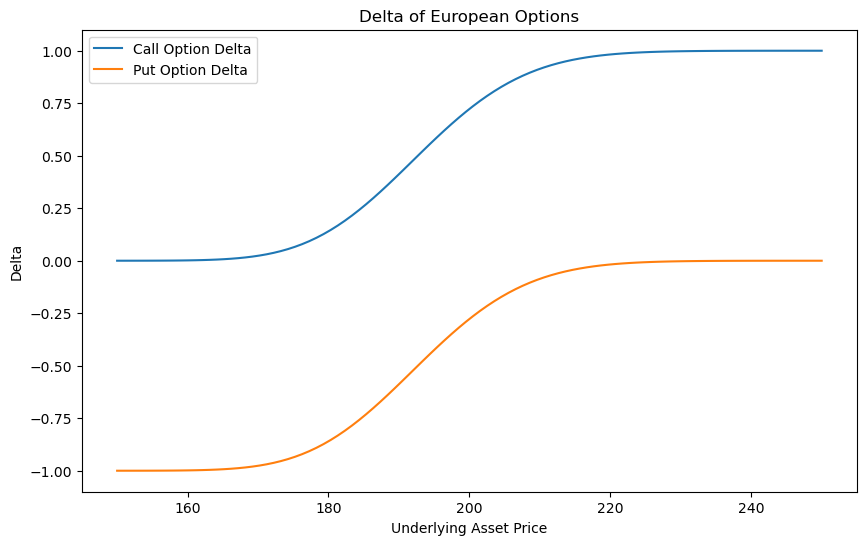

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes Delta 函数
def bs_delta(S, K, T, r, sigma, option = 'call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option == 'call':
        result = norm.cdf(d1)
    if option == 'put':
        result = -norm.cdf(-d1)
    return result

# 参数
r = 0.05
S = np.linspace(150, 250, 100)
T = (pd.to_datetime('2023-08-04') - pd.to_datetime('2023-07-01')).days / 365.0
sigma = np.std(df['Close'].pct_change()) * np.sqrt(252)

# 计算看涨和看跌期权的 Delta
delta_call = bs_delta(S, df['Close'][-1], T, r, sigma, option = 'call')
delta_put = bs_delta(S, df['Close'][-1], T, r, sigma, option = 'put')

# 画图
plt.figure(figsize=(10,6))
plt.plot(S, delta_call, label='Call Option Delta')
plt.plot(S, delta_put, label='Put Option Delta')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Delta')
plt.title('Delta of European Options')
plt.legend()
plt.show()